In [3]:
!pip install split-folders

  Using cached split_folders-0.5.1-py3-none-any.whl (8.4 kB)


In [4]:
import splitfolders

In [1]:
splitfolders.ratio('Dataset/Dataset', output="outputv2", seed=1345, ratio=(.8, 0.1,0.1))

NameError: name 'splitfolders' is not defined

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.image as img
%matplotlib inline

ModuleNotFoundError: No module named 'tensorflow'

In [10]:

# Define image dimensions
IMG_HEIGHT = 224
IMG_WIDTH = 224

# Load the train, test, and validation datasets
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "outputv2/train",
    seed=123,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=64
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "outputv2/test",
    seed=123,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=64
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "outputv2/val",
    seed=123,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=64
)


Found 5119 files belonging to 4 classes.
Found 642 files belonging to 4 classes.
Found 639 files belonging to 4 classes.


In [11]:
class_names = train_ds.class_names
print(class_names)
train_ds

['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']


<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

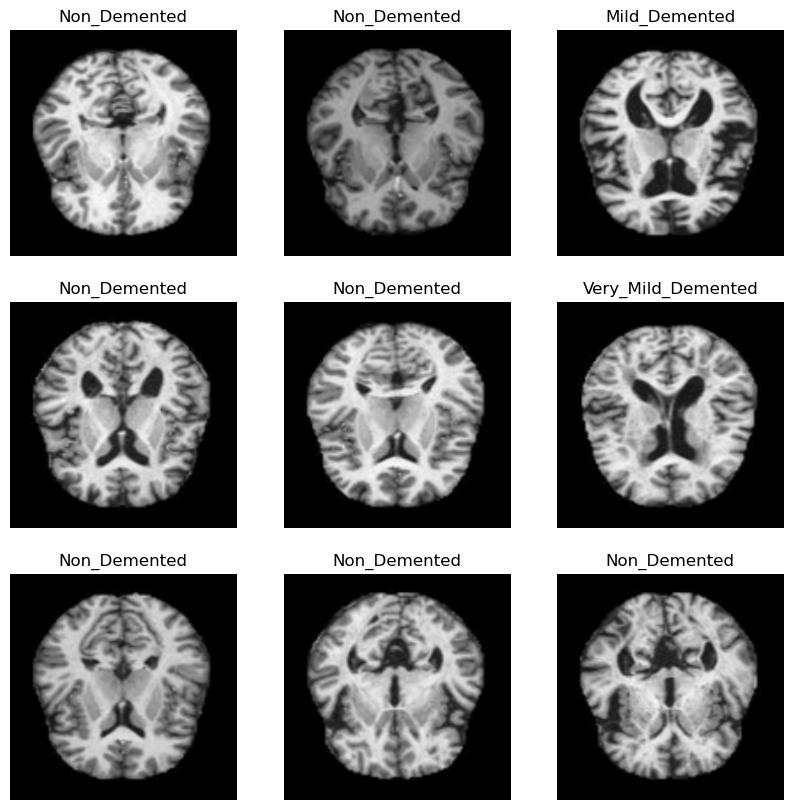

In [12]:

# Display sample images from the training dataset
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [13]:
# Define the MobileNetV3Small base model
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV3Small
base_model = MobileNetV3Small(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
base_model.summary()


4334752/4334752 [==============================] - 12s 3us/step
Model: "MobilenetV3small"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 224, 224, 3)          0         ['input_1[0][0]']             
                                                                                                  
 Conv (Conv2D)               (None, 112, 112, 16)         432       ['rescaling[0][0]']           
                                                                                                  
 Conv/BatchNorm (BatchNorma  (None, 112, 112, 16)         64        ['Conv[0][0]']                
 lization)         

 (DepthwiseConv2D)                                                  d[0][0]']                     
                                                                                                  
 expanded_conv_1/depthwise/  (None, 28, 28, 72)           288       ['expanded_conv_1/depthwise[0]
 BatchNorm (BatchNormalizat                                         [0]']                         
 ion)                                                                                             
                                                                                                  
 re_lu_4 (ReLU)              (None, 28, 28, 72)           0         ['expanded_conv_1/depthwise/Ba
                                                                    tchNorm[0][0]']               
                                                                                                  
 expanded_conv_1/project (C  (None, 28, 28, 24)           1728      ['re_lu_4[0][0]']             
 onv2D)   

                                                                                                  
 tf.math.multiply_3 (TFOpLa  (None, 14, 14, 96)           0         ['re_lu_8[0][0]']             
 mbda)                                                                                            
                                                                                                  
 multiply_2 (Multiply)       (None, 14, 14, 96)           0         ['expanded_conv_3/depthwise/Ba
                                                                    tchNorm[0][0]',               
                                                                     'tf.math.multiply_3[0][0]']  
                                                                                                  
 expanded_conv_3/squeeze_ex  (None, 1, 1, 96)             0         ['multiply_2[0][0]']          
 cite/AvgPool (GlobalAverag                                                                       
 ePooling2

                                                                                                  
 expanded_conv_4/squeeze_ex  (None, 1, 1, 64)             15424     ['expanded_conv_4/squeeze_exci
 cite/Conv (Conv2D)                                                 te/AvgPool[0][0]']            
                                                                                                  
 expanded_conv_4/squeeze_ex  (None, 1, 1, 64)             0         ['expanded_conv_4/squeeze_exci
 cite/Relu (ReLU)                                                   te/Conv[0][0]']               
                                                                                                  
 expanded_conv_4/squeeze_ex  (None, 1, 1, 240)            15600     ['expanded_conv_4/squeeze_exci
 cite/Conv_1 (Conv2D)                                               te/Relu[0][0]']               
                                                                                                  
 tf.__oper

                                                                                                  
 expanded_conv_5/squeeze_ex  (None, 1, 1, 240)            15600     ['expanded_conv_5/squeeze_exci
 cite/Conv_1 (Conv2D)                                               te/Relu[0][0]']               
                                                                                                  
 tf.__operators__.add_10 (T  (None, 1, 1, 240)            0         ['expanded_conv_5/squeeze_exci
 FOpLambda)                                                         te/Conv_1[0][0]']             
                                                                                                  
 re_lu_15 (ReLU)             (None, 1, 1, 240)            0         ['tf.__operators__.add_10[0][0
                                                                    ]']                           
                                                                                                  
 tf.math.m

 re_lu_18 (ReLU)             (None, 1, 1, 120)            0         ['tf.__operators__.add_13[0][0
                                                                    ]']                           
                                                                                                  
 tf.math.multiply_13 (TFOpL  (None, 1, 1, 120)            0         ['re_lu_18[0][0]']            
 ambda)                                                                                           
                                                                                                  
 expanded_conv_6/squeeze_ex  (None, 14, 14, 120)          0         ['multiply_8[0][0]',          
 cite/Mul (Multiply)                                                 'tf.math.multiply_13[0][0]'] 
                                                                                                  
 expanded_conv_6/project (C  (None, 14, 14, 48)           5760      ['expanded_conv_6/squeeze_exci
 onv2D)   

                                                                                                  
 expanded_conv_7/project/Ba  (None, 14, 14, 48)           192       ['expanded_conv_7/project[0][0
 tchNorm (BatchNormalizatio                                         ]']                           
 n)                                                                                               
                                                                                                  
 expanded_conv_7/Add (Add)   (None, 14, 14, 48)           0         ['expanded_conv_6/project/Batc
                                                                    hNorm[0][0]',                 
                                                                     'expanded_conv_7/project/Batc
                                                                    hNorm[0][0]']                 
                                                                                                  
 expanded_

 n)                                                                                               
                                                                                                  
 expanded_conv_9/expand (Co  (None, 7, 7, 576)            55296     ['expanded_conv_8/project/Batc
 nv2D)                                                              hNorm[0][0]']                 
                                                                                                  
 expanded_conv_9/expand/Bat  (None, 7, 7, 576)            2304      ['expanded_conv_9/expand[0][0]
 chNorm (BatchNormalization                                         ']                            
 )                                                                                                
                                                                                                  
 tf.__operators__.add_20 (T  (None, 7, 7, 576)            0         ['expanded_conv_9/expand/Batch
 FOpLambda

 tchNorm (BatchNormalizatio                                         ]']                           
 n)                                                                                               
                                                                                                  
 tf.__operators__.add_23 (T  (None, 7, 7, 576)            0         ['expanded_conv_10/expand/Batc
 FOpLambda)                                                         hNorm[0][0]']                 
                                                                                                  
 re_lu_28 (ReLU)             (None, 7, 7, 576)            0         ['tf.__operators__.add_23[0][0
                                                                    ]']                           
                                                                                                  
 tf.math.multiply_23 (TFOpL  (None, 7, 7, 576)            0         ['re_lu_28[0][0]']            
 ambda)   

 tf.math.multiply_26 (TFOpL  (None, 7, 7, 576)            0         ['re_lu_31[0][0]']            
 ambda)                                                                                           
                                                                                                  
 multiply_17 (Multiply)      (None, 7, 7, 576)            0         ['Conv_1/BatchNorm[0][0]',    
                                                                     'tf.math.multiply_26[0][0]'] 
                                                                                                  
Total params: 939120 (3.58 MB)
Trainable params: 927008 (3.54 MB)
Non-trainable params: 12112 (47.31 KB)
__________________________________________________________________________________________________


In [14]:
# Add custom layers on top of the base model
num_classes = 4
model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 MobilenetV3small (Function  (None, 7, 7, 576)         939120    
 al)                                                             
                                                                 
 global_average_pooling2d (  (None, 576)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 4)                 2308      
                                                                 
Total params: 941428 (3.59 MB)
Trainable params: 929316 (3.55 MB)
Non-trainable params: 12112 (47.31 KB)
_________________________________________________________________


In [15]:
# Set the number of epochs
epochs = 100

# Convert target labels to one-hot encoded format
train_ds = train_ds.map(lambda x, y: (x, tf.one_hot(y, num_classes)))
val_ds = val_ds.map(lambda x, y: (x, tf.one_hot(y, num_classes)))

# Train the model
hist = model.fit(train_ds, epochs=epochs, validation_data=val_ds)

# Save the trained model
model.save('model.h5')

Epoch 1/100
80/80 [==============================] - 219s 3s/step - loss: 0.7404 - accuracy: 0.6775 - val_loss: 0.9473 - val_accuracy: 0.5775
Epoch 2/100
80/80 [==============================] - 197s 2s/step - loss: 0.3135 - accuracy: 0.8804 - val_loss: 1.7041 - val_accuracy: 0.5321
Epoch 3/100
80/80 [==============================] - 198s 2s/step - loss: 0.1277 - accuracy: 0.9545 - val_loss: 1.8620 - val_accuracy: 0.4726
Epoch 4/100
80/80 [==============================] - 196s 2s/step - loss: 0.0771 - accuracy: 0.9742 - val_loss: 2.5555 - val_accuracy: 0.5649
Epoch 5/100
80/80 [==============================] - 195s 2s/step - loss: 0.0720 - accuracy: 0.9754 - val_loss: 1.6295 - val_accuracy: 0.6072
Epoch 6/100
80/80 [==============================] - 196s 2s/step - loss: 0.0475 - accuracy: 0.9826 - val_loss: 2.5692 - val_accuracy: 0.5994
Epoch 7/100
80/80 [==============================] - 196s 2s/step - loss: 0.0349 - accuracy: 0.9869 - val_loss: 1.8359 - val_accuracy: 0.6573
Epoch 

C:\Users\zakif\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [16]:
# Convert target labels of the test dataset to one-hot encoded format
test_ds = test_ds.map(lambda x, y: (x, tf.one_hot(y, num_classes)))

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_ds)
print(f'Test loss: {test_loss}, Test accuracy: {test_accuracy}')


11/11 [==============================] - 7s 478ms/step - loss: 0.0217 - accuracy: 0.9922
Test loss: 0.021652227267622948, Test accuracy: 0.9922118186950684


In [17]:
get_ac = hist.history['accuracy']
get_los = hist.history['loss']
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']

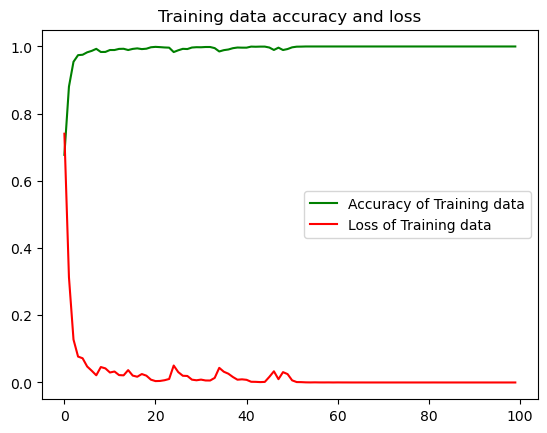

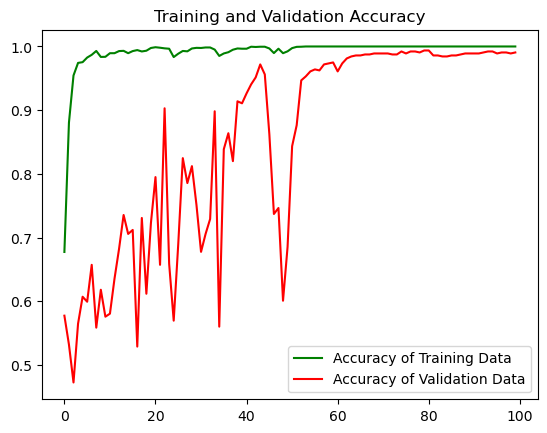

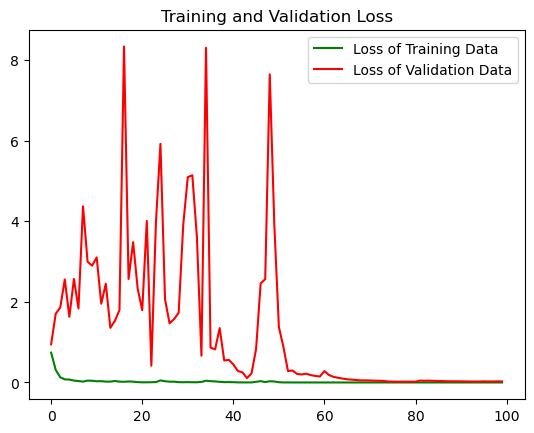

<Figure size 640x480 with 0 Axes>

In [18]:
epochs = range(len(get_ac))
plt.plot(epochs, get_ac, 'g', label='Accuracy of Training data')
plt.plot(epochs, get_los, 'r', label='Loss of Training data')
plt.title('Training data accuracy and loss')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, get_ac, 'g', label='Accuracy of Training Data')
plt.plot(epochs, val_acc, 'r', label='Accuracy of Validation Data')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, get_los, 'g', label='Loss of Training Data')
plt.plot(epochs, val_loss, 'r', label='Loss of Validation Data')
plt.title('Training and Validation Loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [19]:
loss, accuracy = model.evaluate(test_ds)

11/11 [==============================] - 6s 494ms/step - loss: 0.0217 - accuracy: 0.9922


1/1 [==============================] - 0s 36ms/step


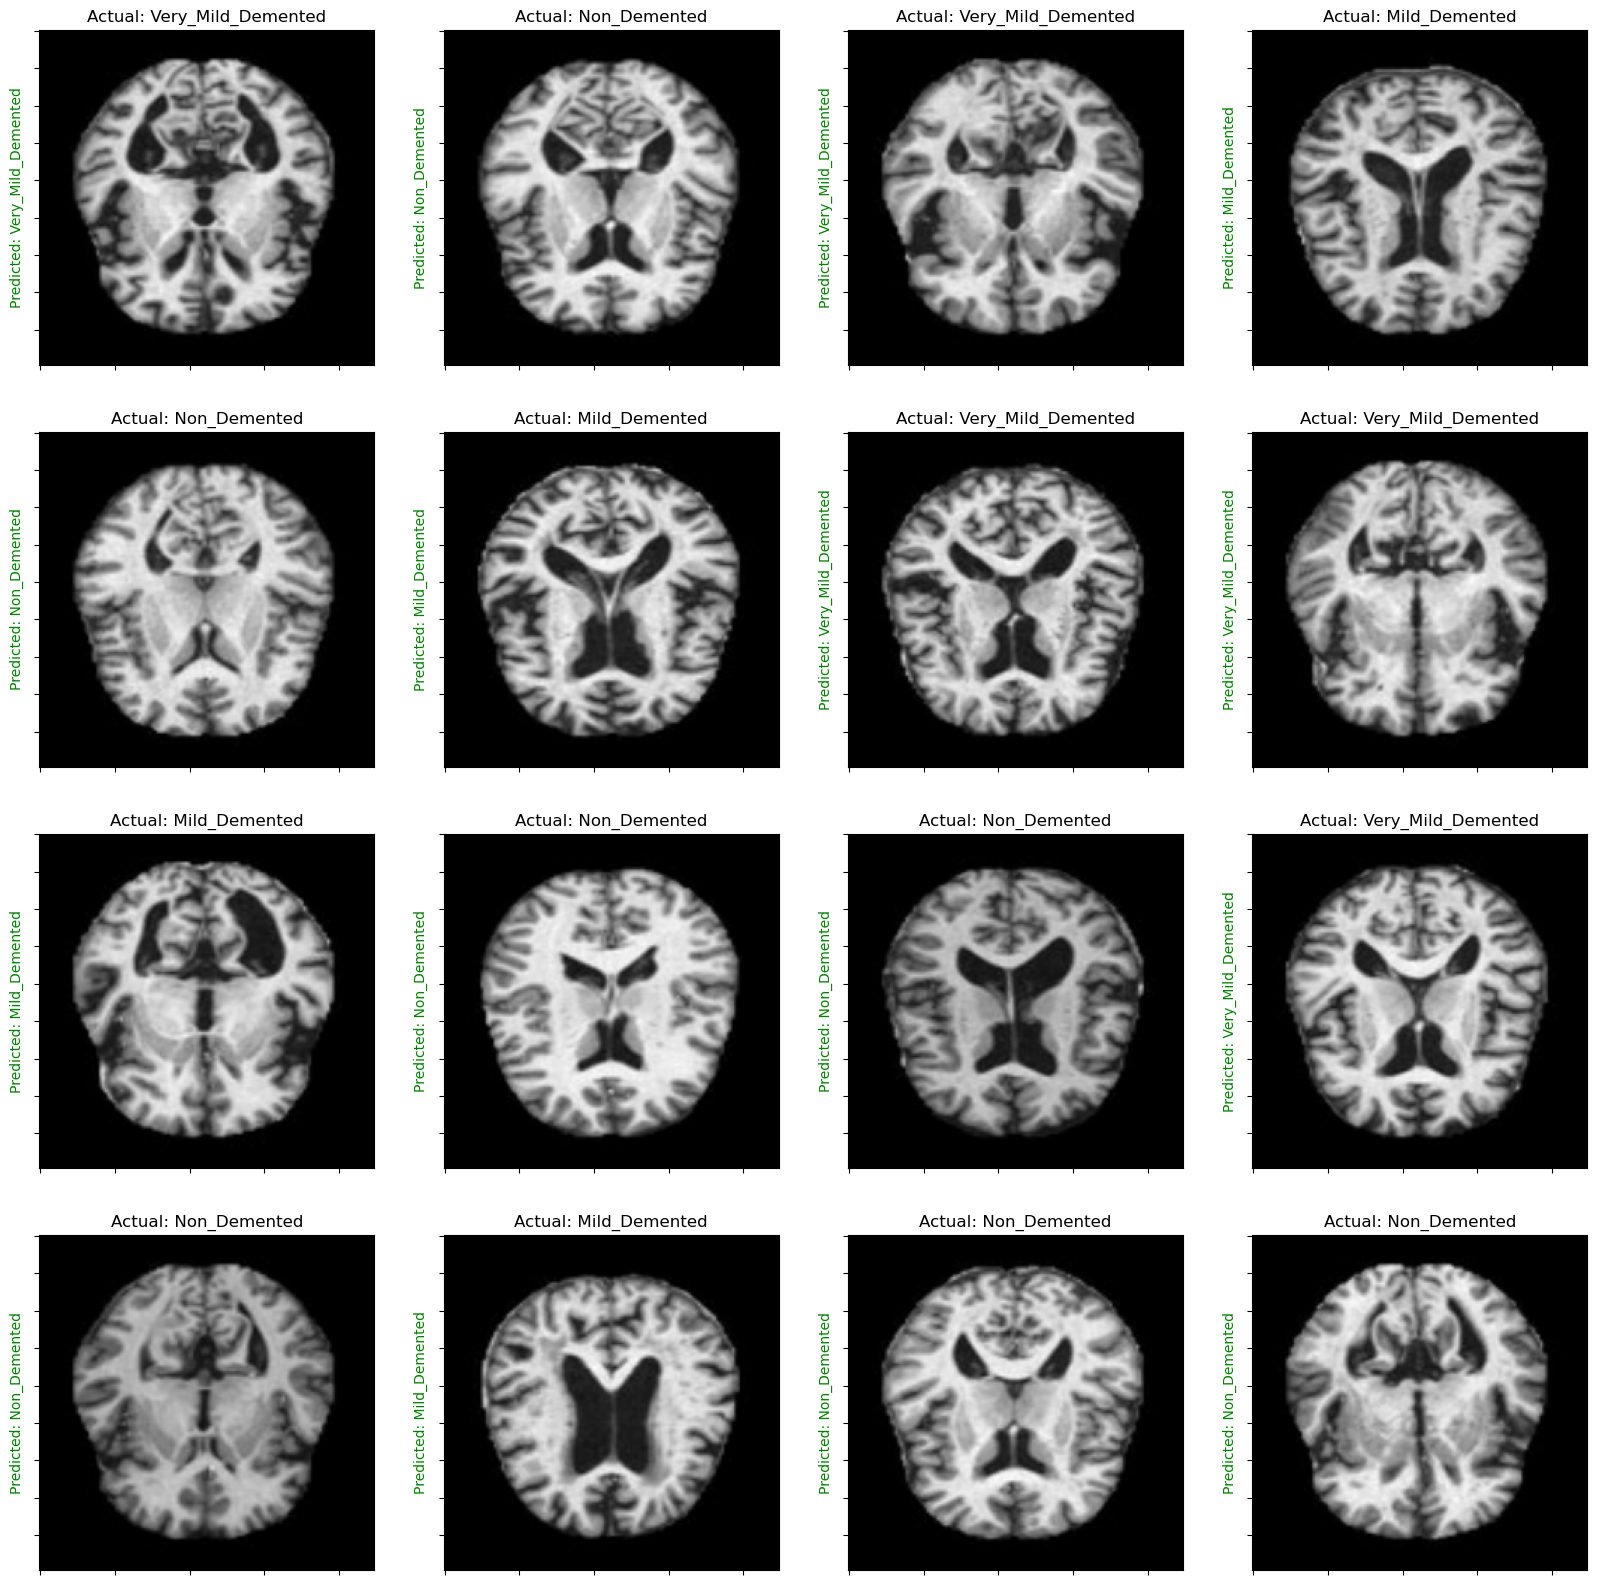

In [20]:
plt.figure(figsize=(20, 20))
for images, labels in test_ds.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predictions = model.predict(tf.expand_dims(images[i], 0))
        score = tf.nn.softmax(predictions[0])
        if class_names[np.argmax(labels[i].numpy())] == class_names[np.argmax(score)]:
            plt.title("Actual: " + class_names[np.argmax(labels[i].numpy())])
            plt.ylabel("Predicted: " + class_names[np.argmax(score)], fontdict={'color': 'green'})
        else:
            plt.title("Actual: " + class_names[np.argmax(labels[i].numpy())])
            plt.ylabel("Predicted: " + class_names[np.argmax(score)], fontdict={'color': 'red'})
        plt.gca().axes.yaxis.set_ticklabels([])
        plt.gca().axes.xaxis.set_ticklabels([])
